# (E7) 나랑 닮은 연예인을 찾아보자

- 일시: 2020.01.28

# Step 1. 사진 모으기

In [1]:
# 고차원 정보를 저차원 변환하면서 필요한 정보를 변환하는 것이 임베딩.
# 100x100x3만 해도 차원수가 30000. 그래서 128차원으로 축소.

# 어떻게 축소하나?


# pip을 사용해 face_recognotion릏 설치해줌.
# 전에 dlib이 설치되어 있어야 함으로 아래 설치 과정을 진행해주어야 함.

# pip install cmake
# pip install dlib
#pip install face_recognition --user

# 위 작업은 메모리를 많이 욕구할 수 있음.

# aiffel 파일에 face_embedding/images파일을 만들고 그 안에 생플 이미지를 다운받아서 진행.

- 내 얼굴 사진 3장을 구합니다. ```~/aiffel/face_embedding/pr_images```에 이미지를 넣어줍니다. 

- 비교할 연예인 사진을 구합니다.    
슬랙에서 변호윤 퍼실님께서 올려주신 한국 셀럽들 사진 파일을 다운받습니다. 압축을 풀어준 후, ```~/aiffel/face_embedding/pr_images```에 사진들을 풀어서 옮겨놓았습니다.

## 내 얼굴 간 임베딩 벡터 거리 구해보기

- 추가로 알아볼 것: 안경을 벗은 내 사진과 안경을 쓴 얼굴 임베딩 벡터의 거리는?

# Step 2. 얼굴 영역 자르기

- 내 얼굴 영역 자르기

[(603, 1668, 1402, 869)]


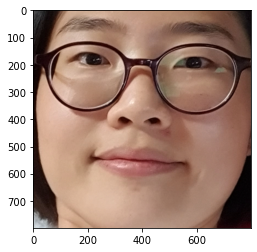

In [3]:
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/face_embedding/pr_images/곽정은1.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 얼굴 영역의 좌표를 출력.

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face) # 잘라낸 얼굴 영역만 출력

In [4]:
def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)

    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

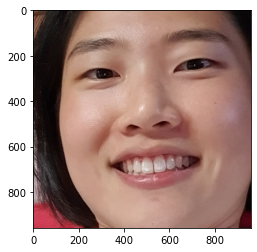

In [7]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/pr_images/곽정은4.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

- 연예인 얼굴 영역 자르기

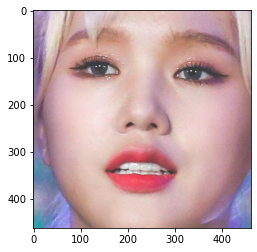

In [8]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/pr_images/미미.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

# Step 3. 얼굴 영역의 임베딩 추출하기

- 얼굴 사진들 디렉토리 확인

In [9]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/pr_images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['obama.jpg', '줄리엔강.png', '김경진.png', '미미.jpg', '공유.jpg', '문별.jpg', '러블리즈예인.jpg', '김대중.jpg', '주호민.jpeg', '주진모(올드).jpg', '김영삼.jpeg', '곽정은4.jpg', '김광현.jpg', '공효진.jpg', '김상호.png', '리암 니슨.png', 'trump.jpg', '기성용.jpg', '곽정은3.jpg', '권태원.jpeg', '지수.jpg', '김남주.jpeg', '고창석.jpeg', '개리.jpg', '개코.jpeg', '나인뮤지스경리.jpg', '지민(BTS).jpg', '김구라.jpg', '딕헌터.jpeg', 'bush.jpeg', '지코.jpg', '권현빈.jpg', '김C.jpeg', 'clinton.jpeg', '김연우.jpeg', '강미나.jpg', '김래원.jpeg', '김민재.jpeg', 'biden.jpg', '김고은.jpeg', '길.jpg', '김유정.jpg', '민니.jpg', '지드래곤.jpeg', '곽정은1.jpg', '효정.jpg', '곽도원.jpg', '강민경.jpg', '러블리즈지수.jpeg']


- 내 얼굴 사진 벡터 구하기

In [10]:
import numpy as np

image_file = os.path.join(dir_path, '곽정은1.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face) #
embedding # 리스트

[array([-0.07347561,  0.05766579,  0.04552832, -0.07683185, -0.13635118,
        -0.04648813, -0.08837649, -0.133734  ,  0.10709433, -0.17340997,
         0.17714012, -0.08595807, -0.17685272, -0.01861723, -0.02950682,
         0.18263343, -0.19593047, -0.08663022, -0.02271221, -0.01706648,
         0.07555545,  0.03168508,  0.01450088,  0.03333282, -0.05719288,
        -0.37859085, -0.14210354, -0.08318214, -0.02615093, -0.01055643,
        -0.06797045,  0.03536029, -0.11656996, -0.00844566,  0.03287132,
         0.10080717, -0.05132426, -0.13094133,  0.16170007, -0.03288582,
        -0.25075236,  0.05658276,  0.09239558,  0.18688132,  0.17524415,
         0.02971568,  0.01920304, -0.11922881,  0.11245739, -0.15276872,
         0.03087092,  0.13518806,  0.01991691,  0.04306246,  0.0509878 ,
        -0.10958179,  0.07146731,  0.10388877, -0.15743749, -0.03470572,
         0.115226  , -0.09429731, -0.00333286, -0.04817721,  0.25915465,
         0.13381377, -0.10692126, -0.19800478,  0.1

In [11]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        if len(face) == 0: continue # 얼굴 인식 실패시 embedding_dict에 추가하지 않음
    return embedding_dict

In [12]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['곽정은4']

array([-0.12994875,  0.08280067,  0.04136782, -0.13582566, -0.13230357,
       -0.07426345, -0.10592187, -0.14118101,  0.12321721, -0.130079  ,
        0.18893488, -0.10138091, -0.16425902, -0.0809336 , -0.06039378,
        0.19279645, -0.20417313, -0.09579865, -0.03832577,  0.00371272,
        0.15124588,  0.04260376, -0.01380269,  0.06740316, -0.10165423,
       -0.32111821, -0.10072168, -0.04316295,  0.002627  , -0.03666305,
       -0.0628084 ,  0.01860649, -0.20741609, -0.05004667,  0.01177738,
        0.12077161,  0.00089265, -0.10606395,  0.11299957, -0.01216524,
       -0.26164326,  0.05115988,  0.0700352 ,  0.15704216,  0.18662514,
        0.00608934,  0.01490634, -0.15563521,  0.14775118, -0.16164795,
        0.01870522,  0.13377666,  0.05290361,  0.04541281,  0.04905928,
       -0.11549109,  0.04021595,  0.15045781, -0.13435285, -0.01924224,
        0.10229082, -0.06545178, -0.0272027 , -0.12555765,  0.18576889,
        0.11848712, -0.09786072, -0.21320425,  0.13435331, -0.12

In [13]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

'%0.10f' % float(get_distance('곽정은1', '곽정은4'))

'0.3969057557'

In [16]:
def get_sort_key_func(name1): # 기준점
    def get_distance_from_name1(name2): # 기준점과 비교할 인자
        return get_distance(name1, name2) # 두사이의 거리
    return get_distance_from_name1

sort_key_func = get_sort_key_func('곽정은1')
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때
# trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.
print("done")

done


In [17]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('곽정은1',
  array([-0.07347561,  0.05766579,  0.04552832, -0.07683185, -0.13635118,
         -0.04648813, -0.08837649, -0.133734  ,  0.10709433, -0.17340997,
          0.17714012, -0.08595807, -0.17685272, -0.01861723, -0.02950682,
          0.18263343, -0.19593047, -0.08663022, -0.02271221, -0.01706648,
          0.07555545,  0.03168508,  0.01450088,  0.03333282, -0.05719288,
         -0.37859085, -0.14210354, -0.08318214, -0.02615093, -0.01055643,
         -0.06797045,  0.03536029, -0.11656996, -0.00844566,  0.03287132,
          0.10080717, -0.05132426, -0.13094133,  0.16170007, -0.03288582,
         -0.25075236,  0.05658276,  0.09239558,  0.18688132,  0.17524415,
          0.02971568,  0.01920304, -0.11922881,  0.11245739, -0.15276872,
          0.03087092,  0.13518806,  0.01991691,  0.04306246,  0.0509878 ,
         -0.10958179,  0.07146731,  0.10388877, -0.15743749, -0.03470572,
          0.115226  , -0.09429731, -0.00333286, -0.04817721,  0.25915465,
          0.13381377, -0.106

In [18]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다.
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [19]:
get_nearest_face('곽정은1')

순위 1 : 이름(곽정은4), 거리(0.3969057557495763)
순위 2 : 이름(곽정은3), 거리(0.43637668771330224)
순위 3 : 이름(강미나), 거리(0.44122702617889237)
순위 4 : 이름(러블리즈예인), 거리(0.450146303746135)
순위 5 : 이름(지수), 거리(0.4525625936869094)
